In [1]:
from assets.options import *
from assets.stocks import *

In [2]:
def get_min_price(optionA,optionB,stock):
    B = (optionA.p0-stock.p0)/-optionA.k
    return stock.p0-optionB.k*B

In [3]:
co1 = LongCallOption(t=1,k=20,p0=22.2)
co2 = LongCallOption(t=1, k=40)
s = Stock(p0=41.6)
print(co1.k)
get_min_price(co1,co2,s)

20


2.799999999999997

In [4]:
co1.get_current_price()
co1.get_future_price(1,0.01)

22.422

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
class PayoffDiagram:

    def build_w_stock_change(self,price_range,*args):
        stock_prices = np.arange(
                            price_range[0],
                            price_range[1],
                            (price_range[1]-price_range[0])//10)
        payoff_calc = lambda e: sum([option.get_payoff(stock_price=e) for option in args])
        payoff = list(map(payoff_calc,stock_prices))
        plt.title(f"Payoff Diagram for \n {[arg for arg in args]}")
        plt.plot(stock_prices, payoff)
        plt.xlabel('Stock Price')
        plt.ylabel('Payoffs')
        x1,x2, _, _ = plt.axis()  
        plt.axis((x1,x2,-200,200))
        plt.axhline(y = 0, color="black")
        plt.show()


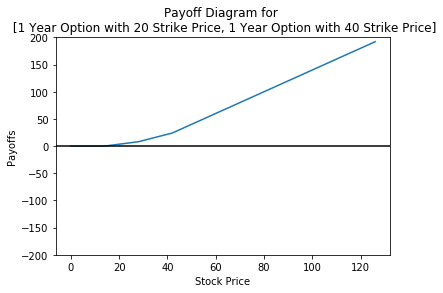

In [9]:
portfolio = [co1,co2]
d = PayoffDiagram()
d.build_w_stock_change((0,140),*portfolio)